In [124]:
# import Libraries:

import numpy as np
import pandas as pd
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [126]:
# create dataset using built-in function:

df = pd.DataFrame({
    "Review":[
        "I love this product! It works great.",
        "Terrible experience. Waste of money.",
        "Absolutely fantastic, will buy again.",
        "Worst quality ever. Not recommended.",
        "Good value for money.",
        "Very bad product, broke in one day."
    ],
    "Sentiment":["Positive","Negative","Positive","Negative","Positive","Negative"]
})
df

Review Sentiment
0   I love this product! It works great.  Positive
1   Terrible experience. Waste of money.  Negative
2  Absolutely fantastic, will buy again.  Positive
3   Worst quality ever. Not recommended.  Negative
4                  Good value for money.  Positive
5    Very bad product, broke in one day.  Negative

In [127]:
# Text Preprocessing Function:

def preprocessing_text(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+","",text)    ## remove URL
    text = re.sub(r"[^a-zA-Z\s]","",text)        ## remove numbers & punctuation 
    text = text.strip()                          ## remove space
    return text

In [128]:
# Apply p[reprocessing:

df['clean_review'] = df['Review'].apply(preprocessing_text)
df.head()

Review Sentiment  \
0   I love this product! It works great.  Positive   
1   Terrible experience. Waste of money.  Negative   
2  Absolutely fantastic, will buy again.  Positive   
3   Worst quality ever. Not recommended.  Negative   
4                  Good value for money.  Positive   

                          clean_review  
0   i love this product it works great  
1   terrible experience waste of money  
2  absolutely fantastic will buy again  
3   worst quality ever not recommended  
4                 good value for money

In [129]:
# Split dataset:

X = df.clean_review
y = df.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [130]:
# TF-TDF Vectorizetion:

tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [131]:
# Tarin Logestic Regression model:

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [132]:
# make Predictions:

y_pred = model.predict(X_test_tfidf)

In [135]:
# Model Evaluation: 

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.0

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



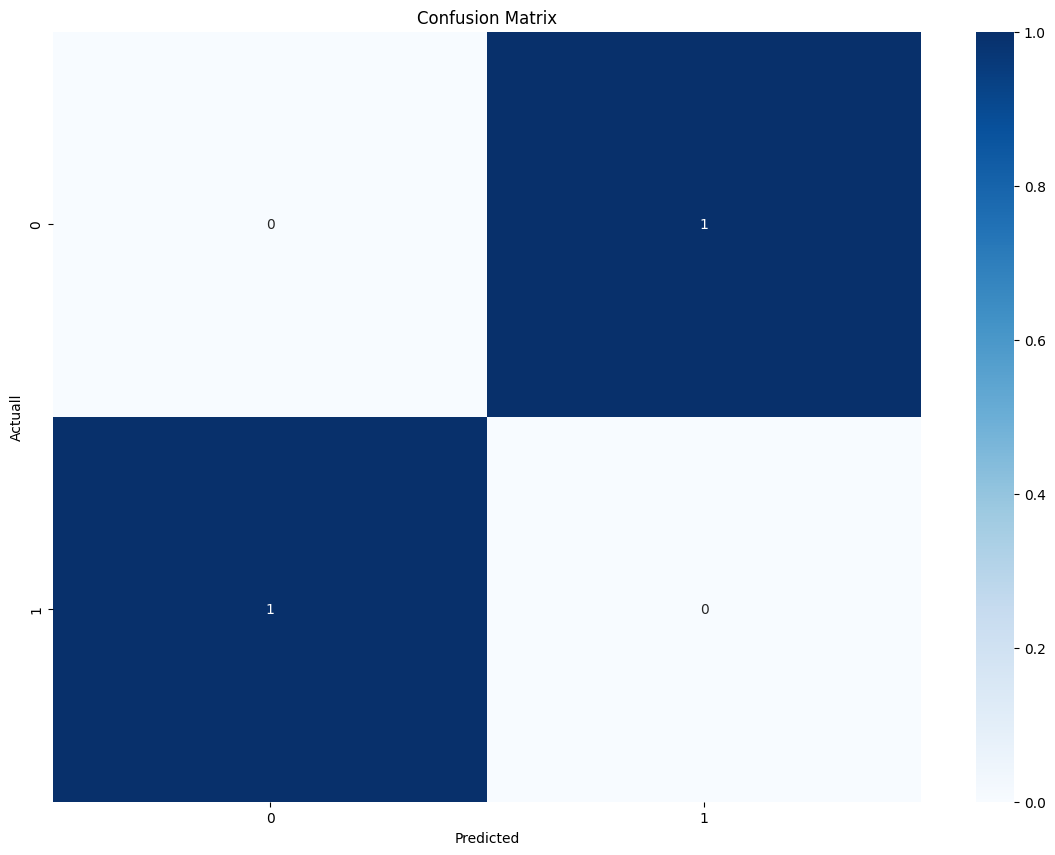

In [136]:
# Confusion Metrix:

plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuall")

plt.show()

In [137]:
# Test on Customer Review:

sample = "this product is wrost i dont like"

sample_clean = [preprocessing_text(sample)]
sample_tfidf = tfidf.transform(sample_clean)

print("Sentiment Prediction:", model.predict(sample_tfidf))

Sentiment Prediction: ['Negative']


In [138]:
#test on Customer Reviews:

sample = "this product is amazing i like it"

sample_clean = [preprocessing_text(sample)[0]]
sample_tfidf = tfidf.transform(sample_clean)

print("Sentiment Prediction:", model.predict(sample_tfidf)[0])

Sentiment Prediction: Positive
